# Plot Micrium Results
## Both filters and current controllers

1st - General Packages For Ploting and DSP

In [31]:
using CSV
using DataFrames
using FFTW
using Plots,Measures
using LaTeXStrings

theme(:bright)
plot_font = "Computer Modern"
default(fontfamily=plot_font,linewidth=2, framestyle=:box, label=nothing, grid=false)
scalefontsizes(1.05)

2nd - File Selection Procedure

2.1 - Oscilloscope Files (For Loop)

In [41]:
FileNumber = 003;
FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\Oscilloscope_Record_" * string(FileNumber,base = 10,pad = 3) * ".csv"
#FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\StepResponse.csv"
#FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\Oscilloscope_Record_Up.csv"
#FilePathType = "CSVs\\Oscilloscope_Record_000_MULTI_REF_MOD_PI_WORKING.csv"
Data = DataFrame(CSV.File(FilePathType,header = 1, delim = ","));
names(Data)

9-element Vector{String}:
 "Time (seconds)"
 "Controller.Vd_Ref"
 "Controller.Vq_Ref"
 "Ic"
 "Controller.Id_Ref"
 "Controller.Iq_Ref"
 "Controller.Id"
 "Controller.Iq"
 "V_DC"

2.1.1 - DQ Current and reference plot

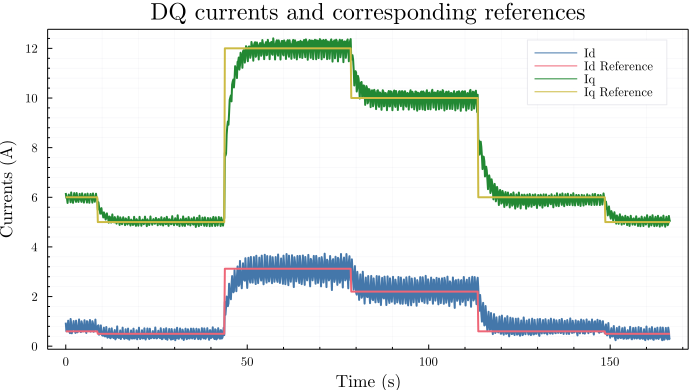

In [43]:
Time = Data."Time (seconds)";

IdRef = Data."Controller.Id_Ref";
Id = Data."Controller.Id";
IqRef = Data."Controller.Iq_Ref";
Iq = Data."Controller.Iq";

p1 = plot(Time,Id, label = "Id");
p1 = plot!(Time,IdRef,label = "Id Reference");
p1 = plot!(title = "DQ currents and corresponding references");
p1 = plot!(ylabel = "Current (A)");

p1 = plot!(Time,Iq, label = "Iq");
p1 = plot!(Time,IqRef, label = "Iq Reference");
p1 = plot!(xlabel = "Time (s)");
p1 = plot!(ylabel = "Currents (A)");

plot(p1,xguidefontsize=11,yguidefontsize=11)
plot!(size = (700,390))
#plot(p1,p2,layout = (2,1))
plot!(fmt = :pdf)

2.1.2 - Error or overshoot lost of control plots

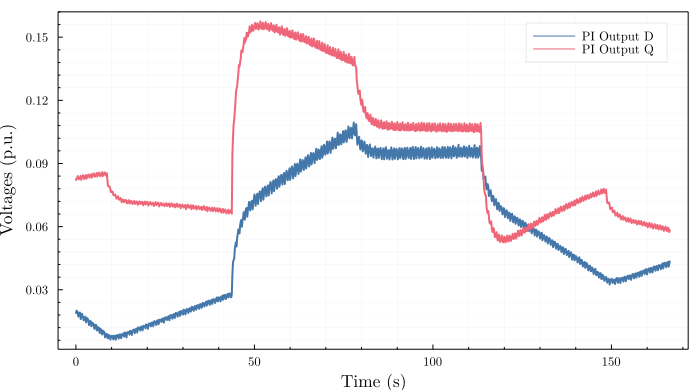

In [44]:
# Error Plot for documentations
Time = Data."Time (seconds)";

p3 = plot(Time,Data."Controller.Vd_Ref",label = "PI Output D");
p3 = plot!(Time,Data."Controller.Vq_Ref",label = "PI Output Q");
p3 = plot!(xlabel = "Time (s)");
p3 = plot!(ylabel = "Voltages (p.u.)");

plot(p3,xguidefontsize=11,yguidefontsize=11)
plot!(size = (700,390))
plot!(fmt = :pdf)

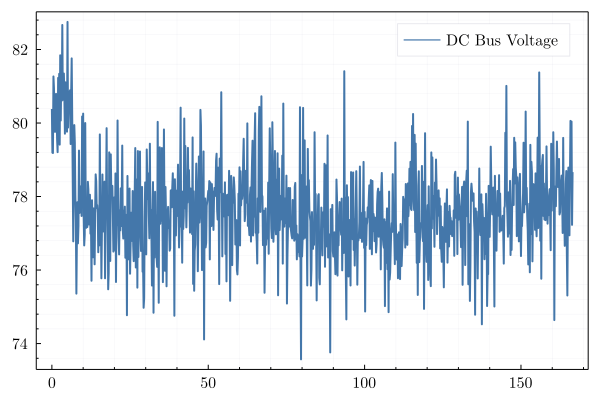

In [12]:
Ia = Data."V_DC";

p1 = plot(Time,Ia,label = "DC Bus Voltage");
plot(p1)

2.2 - Micrium CSV Files (For Loop) (buggie)

In [11]:
FileNumber = 18;
FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\MicriumTest_" * string(FileNumber,base = 10,pad = 3) * ".csv"

Data = DataFrame(CSV.File(FilePathType,header = 1, delim = ","));
names(Data)

9-element Vector{String}:
 "Date Time"
 "Id_Ref"
 "Iq_Ref"
 "Id"
 "Iq"
 "Vd_Ref"
 "Vq_Ref"
 "AuxD"
 "AuxQ"